<a href="https://colab.research.google.com/github/zehraakgul/Data-Visualizations/blob/main/Python_Donem_Projesi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Bölüm
Gerekli kütüphanelerin import edilmesi, dosyanın okunması ve veri tabanının incelenmesi

  Kullanılacak kütüphaneler aşağıdaki kod bloğunda import edilmiş ve dosya local (yerel) olarak pd.read_csv() fonksiyonu ile okunmuştur.
  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
csv_dosya='Telekom.csv'
data = pd.read_csv(csv_dosya)

  Veri tabanın satır ve sütun sayısı data.shape fonksiyonu ile aşağıdaki kod bloğunda bulunmuştur.

In [ ]:
data.shape

(5000, 21)

  Veritabanındaki her sütunun sakladığı veriler ve verilerin tipleri data.dtypes fonksiyonu ile aşağıda listelenmiştir.

In [ ]:
data.dtypes

state                             object
account_length                     int64
area_code                          int64
phone_number                      object
intl_plan                         object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churned                             bool
dtype: object

  Veri tabanındaki sütunların adları basitçe print() fonksiyonu ile ekrana yazdırılmıştır.



In [ ]:
print(data.columns)

Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')


  Bunlara ek olarak, state ve area_code da dahil olmak üzere bu ikisi arasında bulunan sutünların ilk 10 satırının yazdırılması için pandas.DataFrame.loc array özelliği kullanılmıştır.

In [ ]:
data.loc[0:10, 'state':'area_code']

,state,account_length,area_code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510
6,MA,121,510
7,MO,147,415
8,LA,117,408
9,WV,141,415


  İki (veya daha fazla) faktörün basit bir çapraz tablosunu hesaplamak için pandas.crosstab() fonksiyonunu kullandık. Bu fonksiyon, varsayılan olarak, bir değerler dizisi ve bir toplama işlevi geçirilmediği sürece faktörlerin frekans tablosunu hesaplar. Aşağıda da "churned" ve "intl_plan" sütunlarındaki değerlerin frekansı(değerlerin sayısı) aynı anda tek tabloda gösterebilmek adına bu fonksiyon kullanılarak hesaplanmıştır.

In [ ]:
pd.crosstab(data['churned'], data['intl_plan'])

intl_plan,no,yes
churned,,
False,4019,274
True,508,199


Çok seviyeli tablo oluşturmak için pandas.pivot_table() fonksiyonu kullanılmıştır. Aşağıdaki tablolaştırma işleminde "total_day_calls","total_eve_calls","total_night_calls" sütunlarındaki veriler "area_code"a göre toplanıp ortalaması aggfunc özelliği ile alınmış ve daha iyi anlaşılması için tablo haline getirilmiştir.

In [ ]:
data.pivot_table(['total_day_calls' , 'total_eve_calls' , 'total_night_calls'], ['area_code'] , aggfunc = 'mean')

,total_day_calls,total_eve_calls,total_night_calls
area_code,,,
408,99.555997,100.510723,99.325655
415,100.626854,100.234870,99.980361
510,99.311396,99.780096,100.396469


##  2. Bölüm

  Görselleştirme ve Sorgular

---


  Aşağıdaki blokta her eyaletin kaç kere tabloda geçtiği görselleştirilmiştir. Bunu pandas ile yapabilmek için öncelikle bir değişkene atanmış olan eyaletler listesindeki farklı değerleri sayarak (pandas.DataFrame.value_counts()) sıralayıp (pandas.DataFrame.sort_index()) plot.bar() fonksiyonu ile görselleştirilmiştir.
Matplotlib kütüphanesinden gelen figure(figsize()) fonksiyonu ile de grafiğin büyüklüğü ayarlanmıştır.

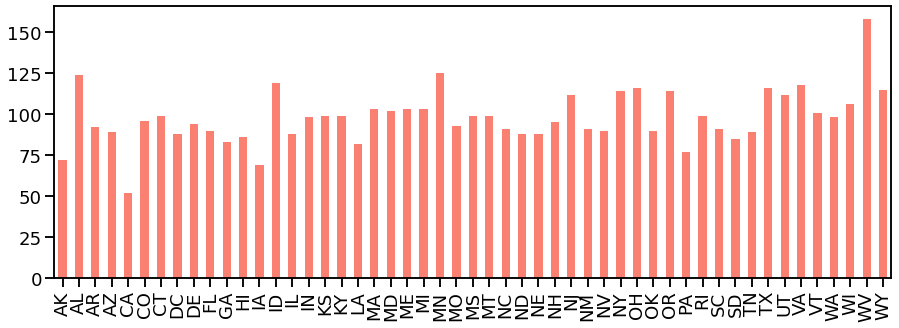

In [ ]:
b = data['state']
plt.figure(figsize=(15,5))
b.value_counts().sort_index().plot.bar(color = 'salmon') 
plt.show()


  Churned satırı, churn şu anlama geliyor; churned bir servisi kullanmayı sonlandırmaktır. yani servis/hizmet satan şirket, artık o vatandaştan para kazanamayacak demektir. Aşağıdaki blokta da onun görselleştirmesi yapılmıştır. plot.pie() fonksiyonu kullanarak pie chart şeklinde yüzdesel gösterimi de yapılmıştır. explode özelliği sayesinde dilimi ayrılmış gibi gösterilmiş, autocpt ile değerelerin yüzdelik oranları alınmış ve pctdistance ile konumları belirlenmiştir. labeldistance ile etiketlerin şekilden uzaklığı, colors ile de kullanılacak renkler atanmış bir diziden veyahut direkt yazılarak kullanılabilir.


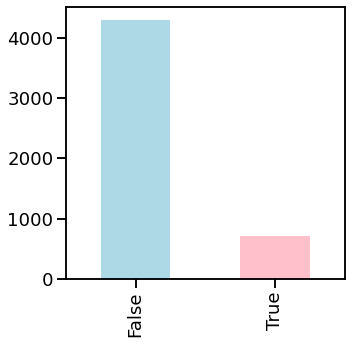

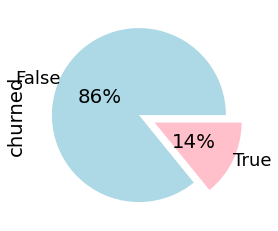

In [ ]:
renk = ['lightblue','pink']
a = data['churned']
plt.figure(figsize=(5,5)) #grafik boyutunu ayarlıyoruz
a.value_counts().sort_index().plot.bar(color = renk) 
plt.show()
explode = (0, 0.2)
a.value_counts().sort_index().plot.pie(explode=explode, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1, colors=renk) 
plt.show()

  Bu görselleştırmede ise her eyaletteki kullanıcıların "Churned" durumu ve sayıları gösterilmiştir.
  seaborn ile sutün grafiği hazırlanmış ve "hue" özelliği ile eyaletlerdeki müşterilerin churned sayıları karşılaştırılmıştır. tick_params() fonksiyonu ile de grafiğin büyüklüğünden otürü küçük duran x ve y değerleri yeniden boyutlandırılmıştır.

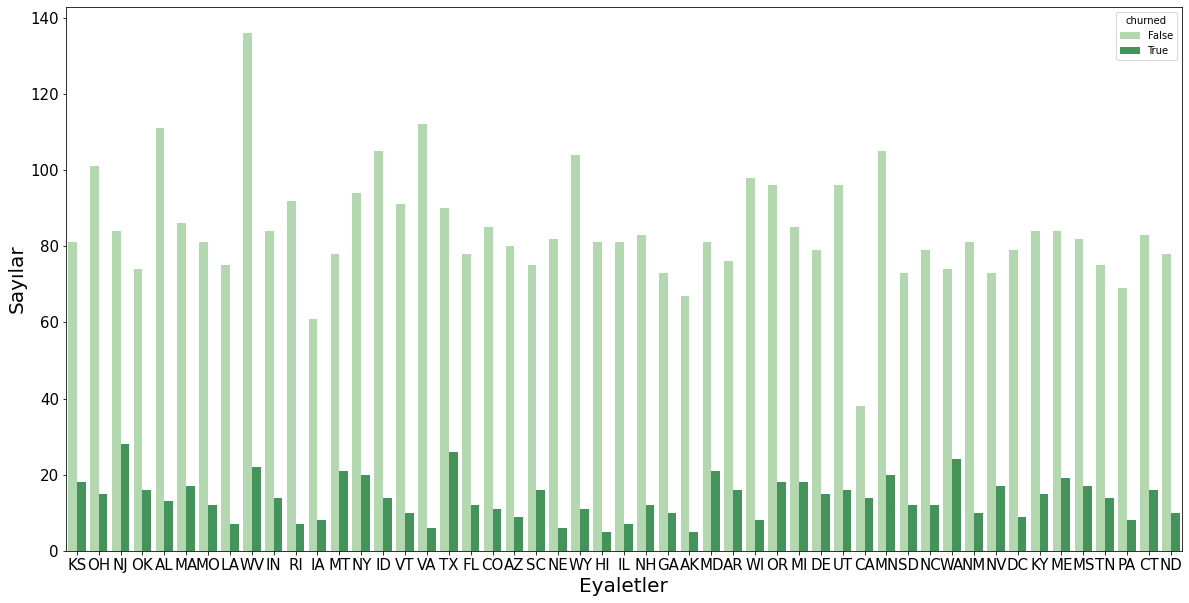

In [ ]:
grafik = plt.subplots(figsize=(20,10))
grafik=sbn.countplot(x='state', hue='churned', data=data, palette='Greens')
grafik.set_xlabel('Eyaletler',size=20)
grafik.set_ylabel('Sayılar', size=20)
grafik.tick_params(labelsize=15)

Aşağıdaki görselleştirme tabloda intl_plan(international plan, uluslararası plan)' a sahip olan kullanıcı sayıları ve yüzdelerini göstermektedir.

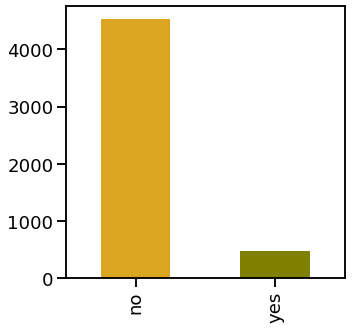

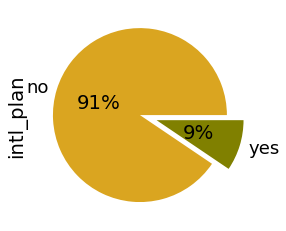

In [ ]:
c = data['intl_plan']
renk2 = ['goldenrod','olive']
plt.figure(figsize=(5,5))
c.value_counts().sort_index().plot.bar(color = renk2)
plt.show()
explode = (0, 0.2)
c.value_counts().sort_index().plot.pie(explode=explode, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, colors=renk2) 
plt.show()

Bu görselleştirmede de müşterilerin ne kadar uluslararası arama yaptığı ve sayıları gösterilmiştir. Örneğin, 7'den fazla uluslararası arama yapanların sayısı 400'den azdır.

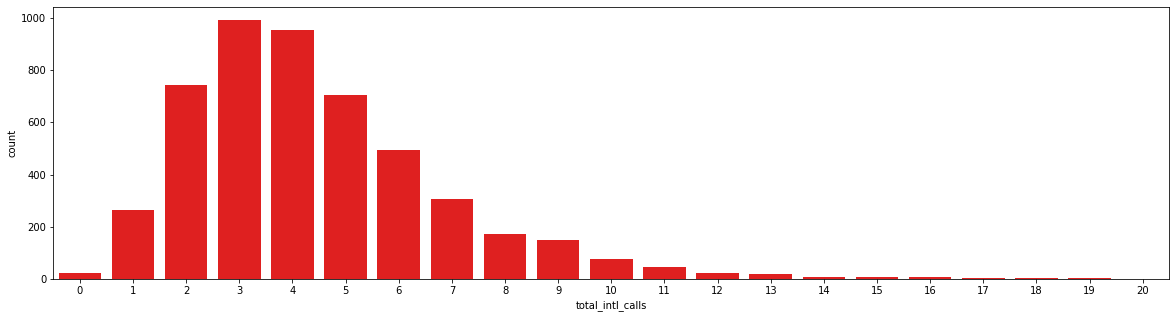

In [ ]:

plt.figure(figsize= (20,5))
sbn.countplot(x='total_intl_calls', data=data, color='red')
plt.show()


Aşağıdaki kod bloğunda ise kullanıcıların kaç farklı "area_code" (alan kodu) olduğu, sayısı ve yüzdesi gösterilmektedir.

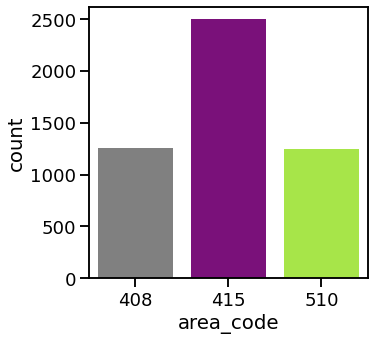

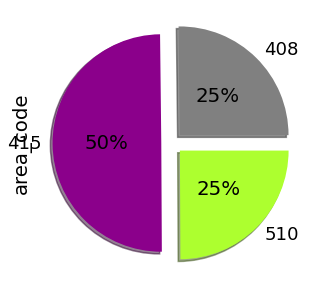

In [ ]:
area_code=data["area_code"]
plt.figure(figsize= (5,5))
color=['gray', 'darkmagenta','greenyellow']
sbn.countplot(x='area_code', data=data, palette=color)
plt.show()
plt.figure(figsize= (10,5))
explode = (0.1, 0.1, 0.1)
area_code.value_counts().sort_index().plot.pie(explode=explode,autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, shadow=True, colors=color) 
plt.show()

Uluslararası planı olan ve olmayan kişilerin churned durumu aşağıdaki gibi görselleştirilmiştir. matplotlib'den gelen matplotlib.pyplot.subplots() fonksiyonu ile yan yana "shared" sutün grafiği ile görselleştirmesi yapılmıştır.

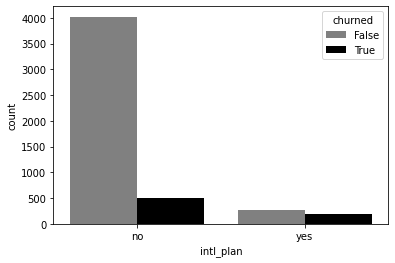

In [ ]:
palette=["grey", "black"]
plt.subplots(1, sharey = True, figsize=(6,5))
sbn.countplot(x = 'intl_plan', hue = 'churned', data = data, palette = palette)
plt.show()


Bu görselleştirmede de sesli mesaj hizmeti alan ve almayan müşterilerin "churned" olup olmama durumlarına göre ikili sütun grafiği hazırlanmıştır.

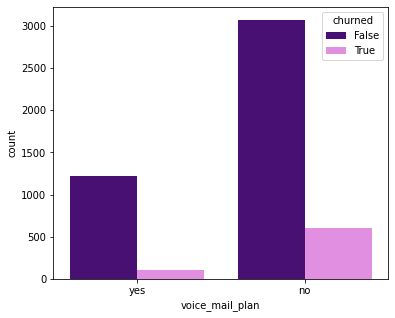

In [ ]:
palette=["indigo", "violet"]

plt.subplots(1, sharey = True, figsize=(6,5))
sbn.countplot(x = 'voice_mail_plan', hue = 'churned', data = data, palette=palette)

Müşterilerin sesli mesaj hizmeti alıp almadığını ve bunun sayılarıyla beraber yüzdelerini de gösteren görselleştirmeler yapılmıştır.

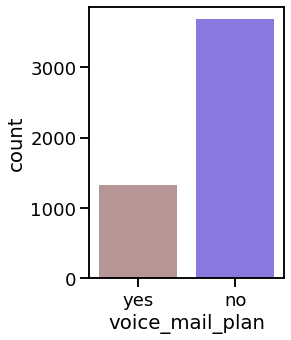

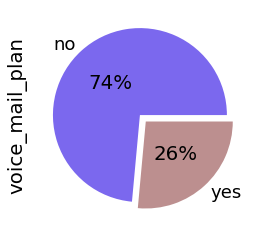

In [ ]:
plt.figure(figsize=(3.5,5))
palette=["rosybrown","mediumslateblue"]
palette1=["mediumslateblue","rosybrown"]

sbn.countplot(x='voice_mail_plan', data=data, palette=palette)
plt.show()
d = data['voice_mail_plan']
explode = (0, 0.1)
d.value_counts().sort_index().plot.pie(explode=explode, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.1, colors = palette1) 
plt.show()

Gündüz toplam aramaların, akşam toplam aramaların ve gece toplam aramaların sayısının histogram grafiği matplotlib kütüphanesindeki hist() fonksiyonu ile gerçekleştirilmiştir.

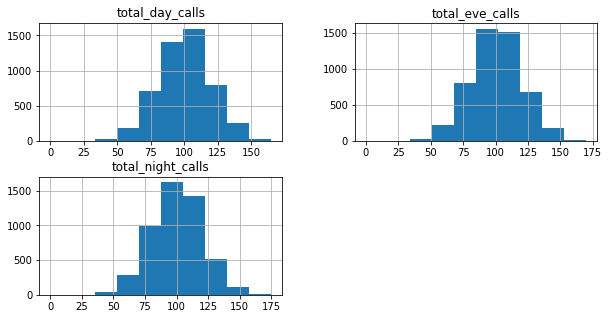

In [ ]:
aramalar = ['total_day_calls', 'total_eve_calls' ,'total_night_calls' ]
data[aramalar].hist(figsize=(10,5));

Aşağıdaki görselleştirmede 24 saat içerisinde (gündüz, akşam ve gece olmak üzere) yapılan aramaların dakikaların yoğunluk tablosu yapılmıştır. Seaborn kütüphanesinden gelen seaborn.kdeplot() fonksiyonu ile yoğunluk grafiği yapılmıştır. plt.legends() ile otomatik olarak eklenmeyen grafikte bulunan değişkenlerin adları ve grafikte nasıl temsit edildiği gösterilmiştir.

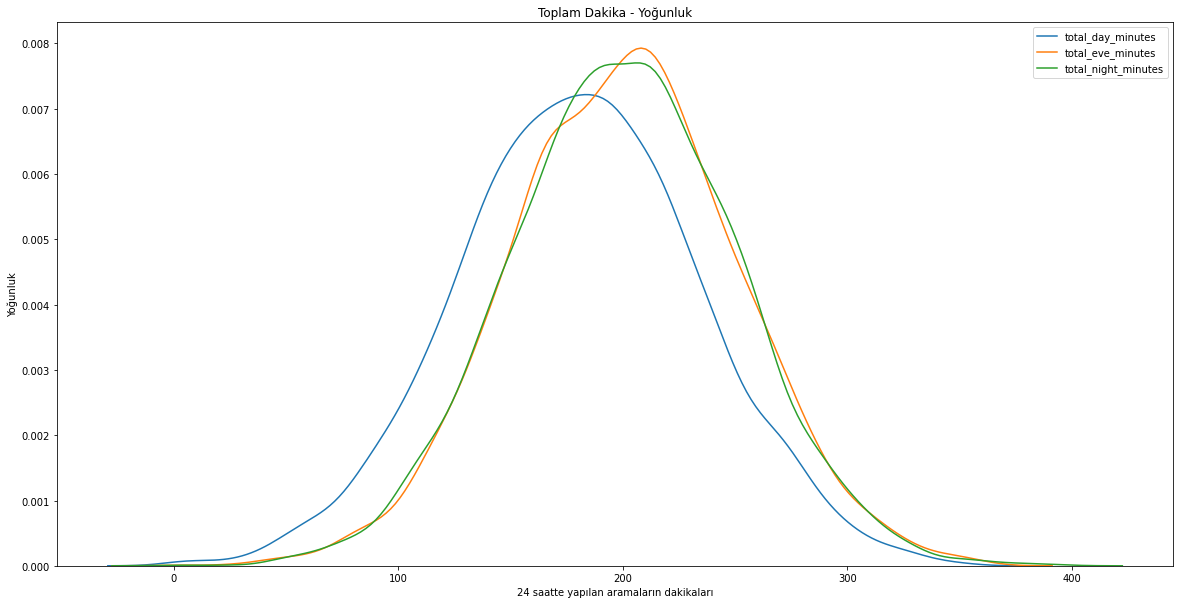

In [ ]:
plt.figure(figsize=(20,10))
sbn.kdeplot(data["total_day_minutes"])
sbn.kdeplot(data["total_eve_minutes"])
sbn.kdeplot(data["total_night_minutes"])
plt.xlabel("24 saatte yapılan aramaların dakikaları")
plt.ylabel("Yoğunluk")
plt.title("Toplam Dakika - Yoğunluk")
plt.legend(labels=["total_day_minutes","total_eve_minutes","total_night_minutes"])
plt.show()

Bu görselleştirmede de alan koduna göre hesapların ne kadar aktif olduğunun yoğunluk grafiği yapılmıştır. "fill" özelliği ile grafiklerin içi boyanmış, "alpha" ile de renkler saydamlaştırılmıştır. Bu grafiğe bakarak en aktif olan hesapların alan kodlarının 415 olduğu yorumunu yapabiliriz.


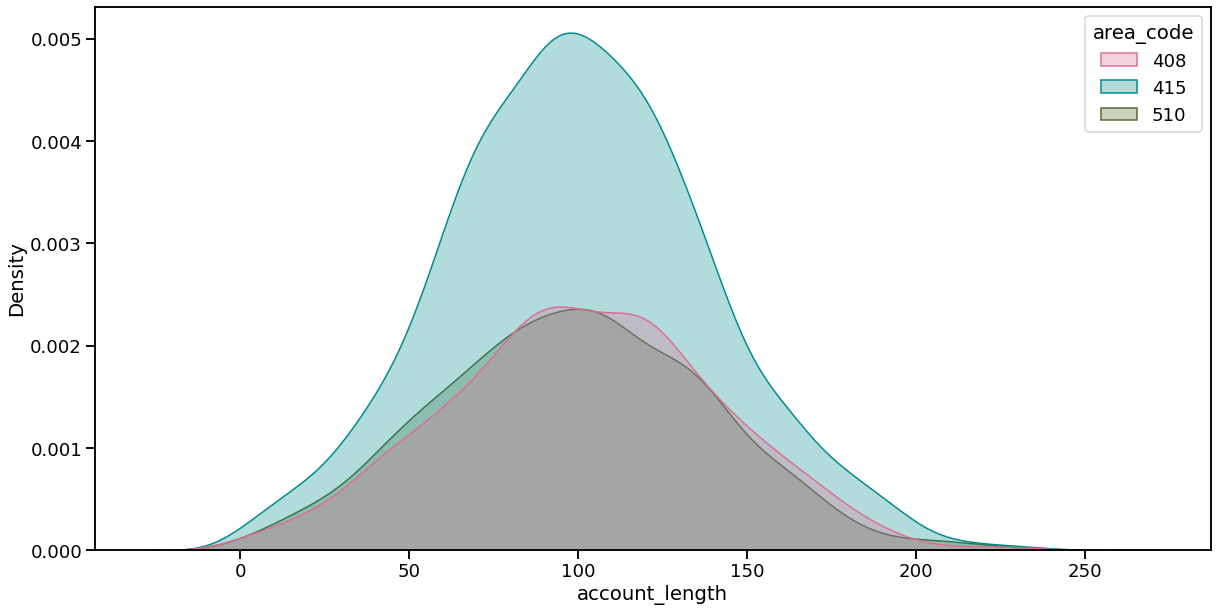

In [ ]:
plt.figure(figsize=(20,10))
renk=["palevioletred","darkcyan","darkolivegreen"]
sbn.kdeplot(data=data, x="account_length", hue="area_code", fill=True, alpha=0.3, palette=renk)
plt.show()

Aşağıdaki görselleştirmede yapılan aramaları gündüz, akşam, gece ve uluslarası fiyatlandırmalarının yoğunluk tablosunu oluşturmak için tablodan gereksiz sütunlar droplandı ve yeni bir değişkene atanarak tabloda kullanılmak üzere kaydedildi. Örneğin bu grafiğe bakarak en fazla ücretlendirme uluslarası aramalarda yapılmış diyebiliriz.


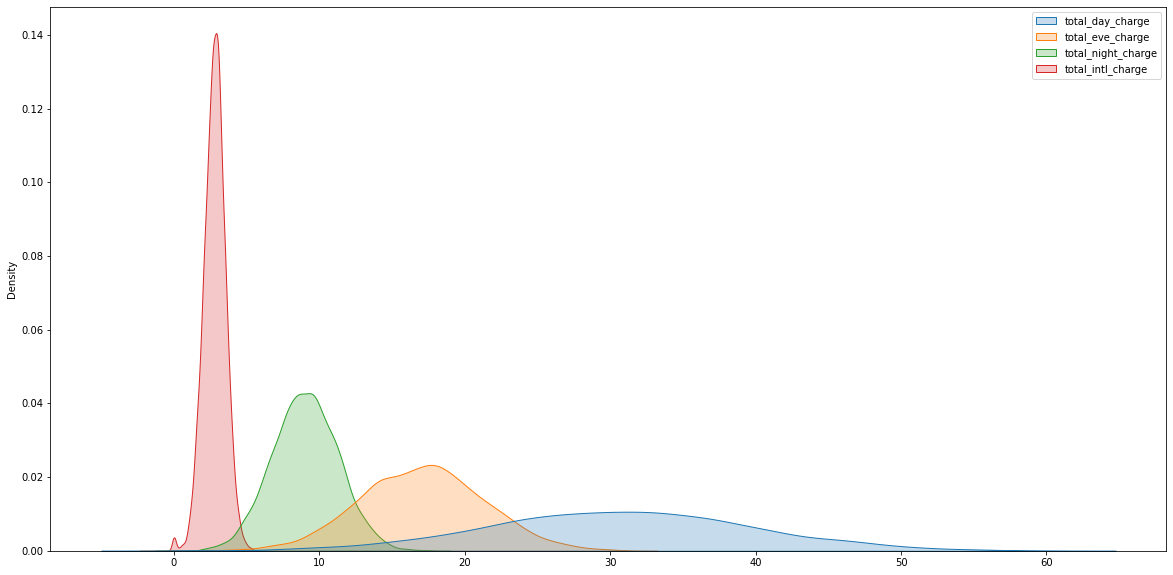

In [ ]:
plt.figure(figsize=(20,10))
veri = data.drop(columns=["state","account_length","area_code","phone_number","intl_plan","voice_mail_plan",
                          "number_vmail_messages","total_day_minutes","total_day_calls","total_eve_minutes","total_eve_calls",
                          "total_night_minutes","total_night_calls","total_intl_minutes","total_intl_calls",
                          "number_customer_service_calls","churned"] )
sbn.kdeplot(data=veri, fill=True)
plt.show()

Aşağıdaki görselleştirmede de eyaletlere göre kullanıcılıların uluslararası planlarının olup olmadığı, ne kadar uluslarası arama yaptığı ve ücretlendirildiği tek bir grafikte(baloncuk/dağılım grafiği) gösterilmiştir. size özelliğiyle ücrete göre baloncukların büyüklüğü, sizes özelliği ile de baloncukların alabileceği büyüklük değer aralığı girilmiştir.

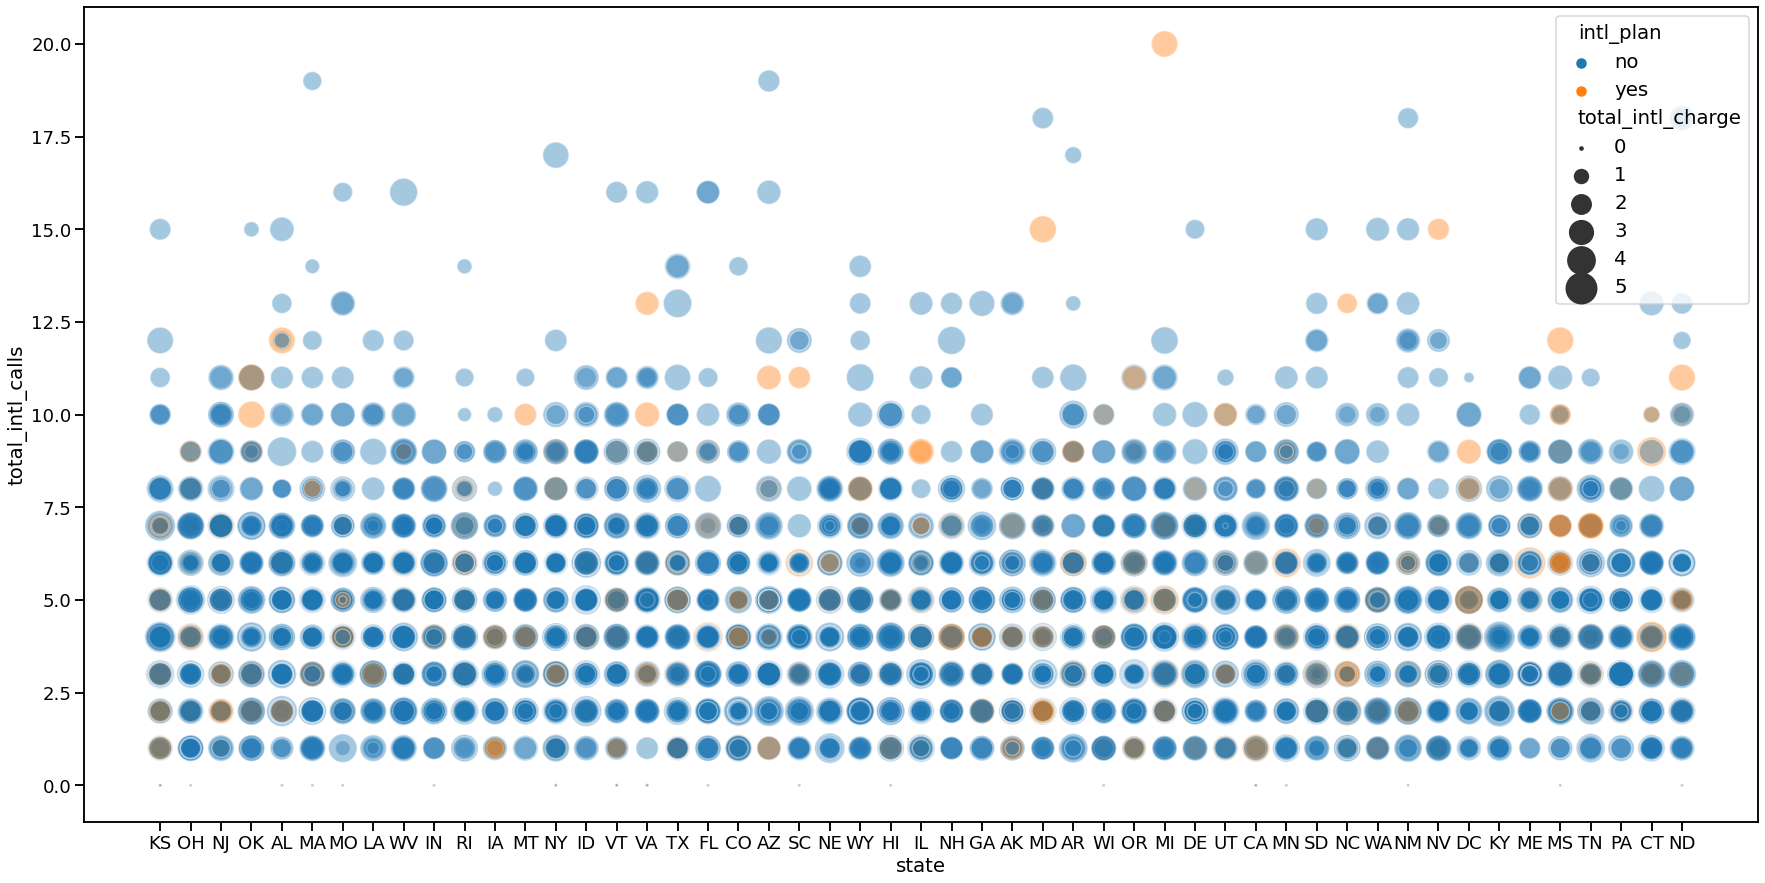

In [ ]:
plt.figure(figsize=(30,15))
sbn.scatterplot(x="state", 
                y="total_intl_calls",
                size="total_intl_charge",
                sizes=(10,1000),
                alpha=0.4,
                hue="intl_plan",
                data=data)
plt.show()

Gün ve gece içerisinde yapılan arama sayılarını alan koduna ve günlük fiyatlandırmaya göre karşılaştıran görselleştirmesi yapılmıştır.

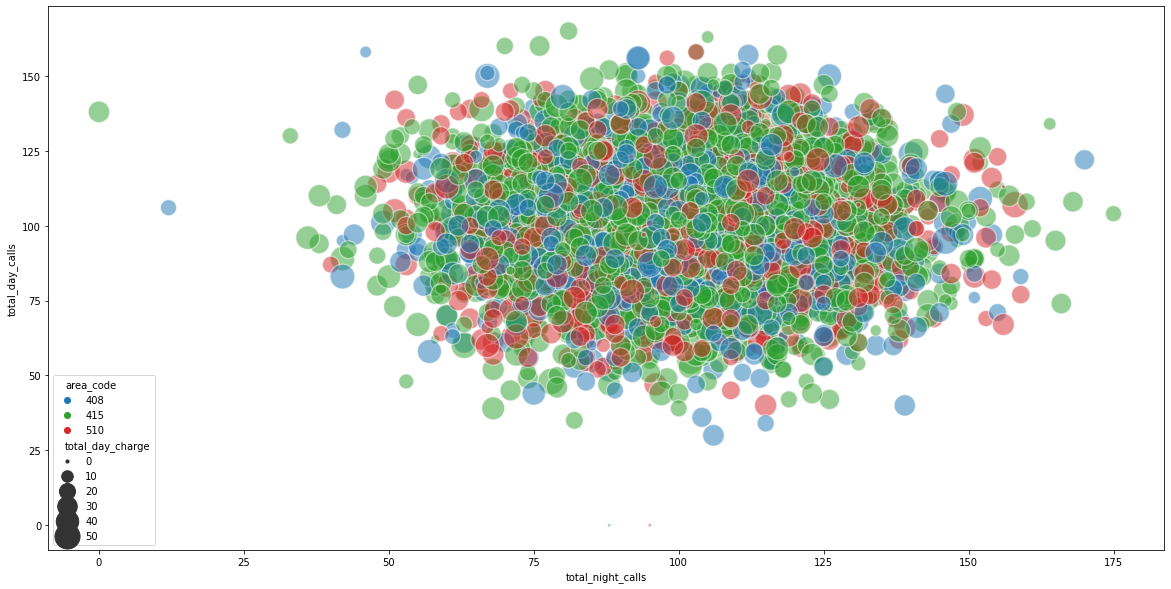

In [ ]:

palette = ['tab:blue', 'tab:green','tab:red']
plt.figure(figsize=(20,10))
sbn.scatterplot(x="total_night_calls", 
                y="total_day_calls",
                size="total_day_charge",
                sizes=(10,750),
                alpha=0.5,
                hue="area_code",
                palette=palette,
                data=data)
plt.show()